## Trabajo Final - Diplomatura en Ciencia de Datos Aplicada üë©‚Äçüíªüë®‚Äçüíª
### Integrantes:
* Boladeras Facundo
* Fontanini Pablo
* Miller Marcos
* Baeza Noeli

# Explicaci√≥n del dataset üå±
Datos de rendimiento de lotes de ma√≠z de primera, desde el ciclo agr√≠cola 2001/02 al 2016/17. El dataset esta conformado por las siguientes variables:
* CICLO: del 2001/02 al 2016/17
* EVENTO: "Ni√±o", "Ni√±a" o "Neutro". Este fen√≥meno es conocido como "El Ni√±o-Southern Oscillation": ENOS, est√° relacionado con cambios de la temperatura superficial del mar en el pac√≠fico y comprende tres fases. 
* pp Nov: precipitaci√≥n promedio por lote durante el mes de noviembre.
* pp Dic: precipitaci√≥n promedio por lote durante el mes de diciembre.
* pp Ene: precipitaci√≥n promedio por lote durante  el mes de enero.
* IPC: √çndice de productividad de suelo. <br>
Se incorporaron datos de **EVI √≠ndice de vegetaci√≥n mejorado** (EVI ‚Äì Enhanced Vegetation Index) para diferentes fechas, es un par√°metro que intenta expresar los efectos atmosf√©ricos sobre la vegetaci√≥n, calculando la diferencia de radiancia entre las bandas del Azul y Rojo, permiti√©ndonos, de esa manera, relevar el estado de la vegetaci√≥n en caso de altas densidades de biomasa. Se diferencia de otros √≠ndices ya que es menos sensible al ruido de fondo atmosf√©rico, satur√°ndose en menor proporci√≥n al visualizar √°reas con vegetaci√≥n verde muy densa. Es una referencia √∫til para analizar zonas con cantidades importantes de clorofila, y preferiblemente con efectos topogr√°ficos m√≠nimos. El producto EVI fue extra√≠do del sensor satelital MODIS (Moderate-Resolution Imaging Spectroradiometer ), producido en intervalos de 16 d√≠as. Para las fechas seleccionadas se obtuvo el m√≠nimo, m√°ximo y la media.
* EROSION POTENCIAL: siendo las siguientes categor√≠as; Moderadamente susceptible, Pr√°cticamente no susceptible, Levemente susceptible, Altamente susceptible.
* EVI 1 Nov media: valores promedio de EVI del pixel puro.
* EVI 1 Nov min: valores m√≠nimos de EVI del pixel puro
* EVI 1 Nov max: valores m√°ximos de EVI del pixel puro
* EVI 17 Nov media: valores promedio de EVI del pixel puro
* EVI 17 Nov min: valores m√≠nimos de EVI del pixel puro.
* EVI 17 Nov max: valores m√≠nimo de EVI del pixel puro.
* EVI 3 Dic media: valores promedio de EVI del pixel puro.
* EVI 3 Dic min: valores m√≠nimos de EVI del pixel puro.
* EVI 3 Dic max: valores m√°ximos de EVI del pixel puro. 
* EVI 19 Dic media: valores promedio de EVI del pixel puro.
* EVI 19 Dic min: valores m√≠nimos de EVI del pixel puro.
* EVI 19 Dic max: valores m√°ximos de EVI del pixel puro.
* EVI 1 Ene media: valores promedio de EVI del pixel puro.
* EVI 1 Ene min: valores m√≠nimo de EVI del pixel puro.
* EVI 1 Ene max: valores m√°ximo de EVI del pixel puro.
* EVI 17 Ene media: valores promedio del pixel puro.
* EVI 17 Ene min: valores m√≠nimos de EVI del pixel puro.
* EVI 17 Ene max: valores m√°ximos de EVI del pixel puro.
* EVI 2 Feb media: valores promedio de EVI del pixel puro.
* EVI 2 Feb min: valores m√≠nimos de EVI del pixel puro.
* EVI 2 Feb max: valores m√°ximos de EVI del pixel puro.
* RINDE: medido en kilogramos por hect√°reas.
* H_Nov: humedad del suelo promedio para el mes de noviembre.
* H_Dic: humedad del suelo promedio para el mes de diciembre.
* H_Ene: humedad del suelo promedio para el mes de enero.
* T_Med_Nov: registros de temperatura promedio para el mes de noviembre.
* T > 33 Nov: registros de temperatura mayor a 33¬∞ C para el mes de noviembre.
* T_Med_Dic: registros de temperatura promedia para el mes de diciembre.
* T > 33 Dic: registros de temperatura mayor a 33¬∞ C para el mes de diciembre.
* T_Med_Ene: registros de temperatura media para el mes de enero.
* T > Ene: registros de temperatura mayor a 33¬∞ C para el mes de enero


# EDA - An√°lisis Exploratorio de Datos üìäüìà

In [2]:
# Importamos las librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras

# Explorar dataset

In [3]:
# Lectura del csv
df = pd.read_csv("./data/datos_ultimos_csv.csv")

In [4]:
df.head()

CICLO  EVENTO          LOTE    SUP pp Nov pp Dic pp Ene IPC  \
0  2001/02  Neutro     TEMPEL N2   64.8    353    140    156  52   
1  2001/02  Neutro            3D  118.4    353    140    156  34   
2  2001/02  Neutro        6NORTE  143.6    353    140    156  32   
3  2001/02  Neutro  BUEYES NORTE  143.1    358    136    120  32   
4  2001/02  Neutro             4   69.4    337    153    170  50   

              EROSION POTENCIAL  EVI 1 Nov media  ...  RINDE  H_Nov  H_Dic  \
0     moderadamente susceptible         0.212712  ...   6675   1458    677   
1  practicamente no susceptible         0.509707  ...   8357   1463    696   
2     moderadamente susceptible         0.484929  ...   7296   1459    689   
3     moderadamente susceptible         0.327773  ...   4668   1455    689   
4     moderadamente susceptible         0.374044  ...   5848   1483    759   

   H_Ene  T_Med_Nov  T > 33 Nov  T_Med_Dic  T > 33 Dic  T_Med_Ene  T > 33 Ene  
0   1064       20.4           0       22.9           0       24.5           6  
1   1111       20.4           0       22.9           0       24.5           6  
2   1093       20.4           0       22.9           0       24.5           6  
3   1092       20.4           0       22.9           0       24.5           6  
4   1239       20.4           0       22.9           0       24.5           6  

[5 rows x 40 columns]

In [5]:
# Visualizar las dimensiones del dataframe
df.shape
print("El dataframe tiene", df.shape[0], "filas y", df.shape[1], "columnas")

El dataframe tiene 176 filas y 40 columnas


In [6]:
# Mostrar las columnas del dataframe
df.columns

Index(['CICLO', 'EVENTO', 'LOTE', 'SUP', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC',
       'EROSION POTENCIAL', 'EVI 1 Nov media', 'EVI 1 Nov min',
       'EVI 1 Nov max', 'EVI 17 Nov media', 'EVI 17 Nov min', 'EVI 17 Nov max',
       'EVI 3 Dic media', 'EVI 3 Dic min', 'EVI 3 Dic max', 'EVI 19 Dic media',
       'EVI 19 Dic min', 'EVI 19 Dic max', 'EVI 1 Ene media', 'EVI 1 Ene min',
       'EVI 1 Ene max', 'EVI 17 Ene media', 'EVI 17 Ene min', 'EVI 17 Ene max',
       'EVI 2 Feb media', 'EVI 2 Feb min', 'EVI 2 Feb max', 'RINDE', 'H_Nov',
       'H_Dic', 'H_Ene', 'T_Med_Nov', 'T > 33 Nov', 'T_Med_Dic', 'T > 33 Dic',
       'T_Med_Ene', 'T > 33 Ene'],
      dtype='object')

In [7]:
# Consultar el tipo de dato de cada columna
df.dtypes

CICLO                 object
EVENTO                object
LOTE                  object
SUP                  float64
pp Nov                object
pp Dic                object
pp Ene                object
IPC                   object
EROSION POTENCIAL     object
EVI 1 Nov media      float64
EVI 1 Nov min        float64
EVI 1 Nov max        float64
EVI 17 Nov media     float64
EVI 17 Nov min       float64
EVI 17 Nov max       float64
EVI 3 Dic media      float64
EVI 3 Dic min        float64
EVI 3 Dic max        float64
EVI 19 Dic media     float64
EVI 19 Dic min       float64
EVI 19 Dic max       float64
EVI 1 Ene media      float64
EVI 1 Ene min        float64
EVI 1 Ene max        float64
EVI 17 Ene media     float64
EVI 17 Ene min       float64
EVI 17 Ene max       float64
EVI 2 Feb media      float64
EVI 2 Feb min        float64
EVI 2 Feb max        float64
RINDE                  int64
H_Nov                 object
H_Dic                 object
H_Ene                 object
T_Med_Nov     

In [8]:
# Contabilizar las variable por tipo de dato
df.dtypes.value_counts()

float64    25
object     11
int64       4
dtype: int64

In [9]:
# Contabilizar los valores nulos 
df.isnull().sum()

CICLO                0
EVENTO               0
LOTE                 0
SUP                  0
pp Nov               0
pp Dic               0
pp Ene               0
IPC                  0
EROSION POTENCIAL    0
EVI 1 Nov media      0
EVI 1 Nov min        0
EVI 1 Nov max        0
EVI 17 Nov media     0
EVI 17 Nov min       0
EVI 17 Nov max       0
EVI 3 Dic media      0
EVI 3 Dic min        0
EVI 3 Dic max        0
EVI 19 Dic media     0
EVI 19 Dic min       0
EVI 19 Dic max       0
EVI 1 Ene media      0
EVI 1 Ene min        0
EVI 1 Ene max        0
EVI 17 Ene media     0
EVI 17 Ene min       0
EVI 17 Ene max       0
EVI 2 Feb media      0
EVI 2 Feb min        0
EVI 2 Feb max        0
RINDE                0
H_Nov                0
H_Dic                0
H_Ene                0
T_Med_Nov            0
T > 33 Nov           0
T_Med_Dic            0
T > 33 Dic           0
T_Med_Ene            0
T > 33 Ene           0
dtype: int64

In [10]:
# En el datset no se contabilizan valores nulos, pero si existen registros con "None" tipo string
# Reemplazamos los valores "None" por NaN
df.replace(to_replace="None", value=np.nan, inplace=True)

<AxesSubplot: >

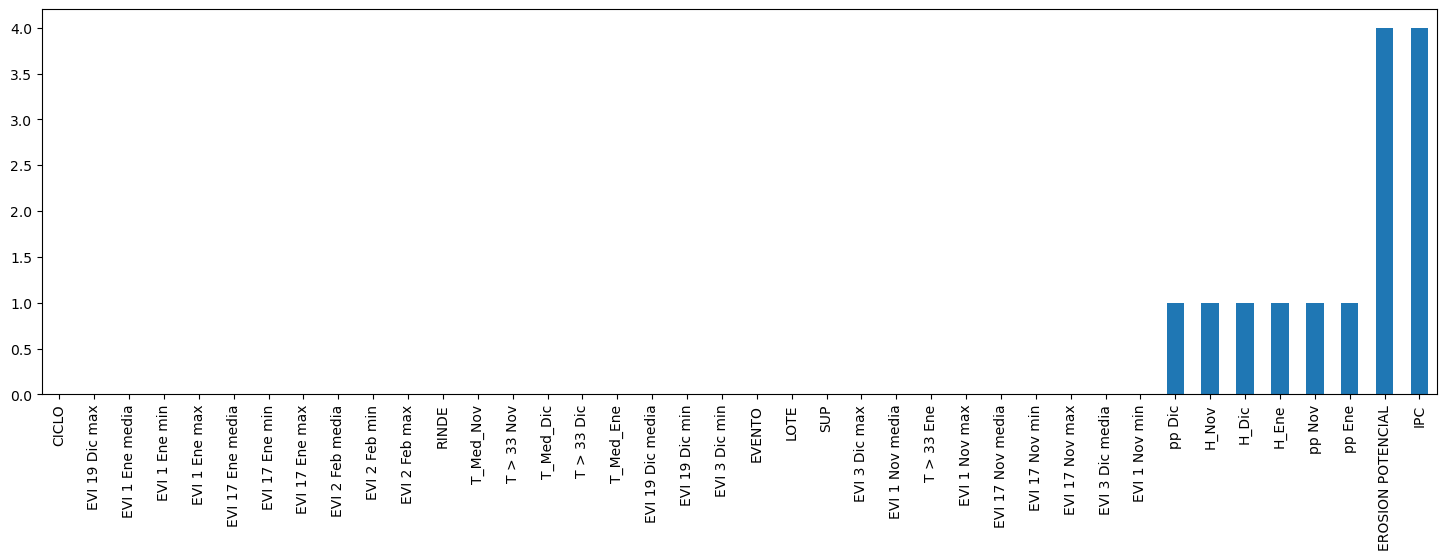

In [11]:
# Contabilizar los valores NaN ordenarlos de menor a mayor
df.isnull().sum().sort_values().plot.bar(figsize=(18, 5))

### Rellenar los valores nulos de las variables 

In [12]:
# Reemplazar los valores NaN por la mediana de la columnas pp Dic, H_Nov, H_Dic, H_Ene, pp Nov, pp Ene
df["pp Dic"].fillna(df["pp Dic"].median(), inplace=True)
df["H_Nov"].fillna(df["H_Nov"].median(), inplace=True)
df["H_Dic"].fillna(df["H_Dic"].median(), inplace=True)
df["H_Ene"].fillna(df["H_Ene"].median(), inplace=True)
df["pp Nov"].fillna(df["pp Nov"].median(), inplace=True)
df["pp Ene"].fillna(df["pp Ene"].median(), inplace=True)


In [13]:
# Reemplazar los valores NaN de la columna EROSION POTENCIAL por la moda
df["EROSION POTENCIAL"].fillna(df["EROSION POTENCIAL"].mode()[0], inplace=True)

In [14]:
# Reemplazar los valores NaN de la columna IPC por la mediana
df["IPC"].fillna(df["IPC"].median(), inplace=True)


<AxesSubplot: >

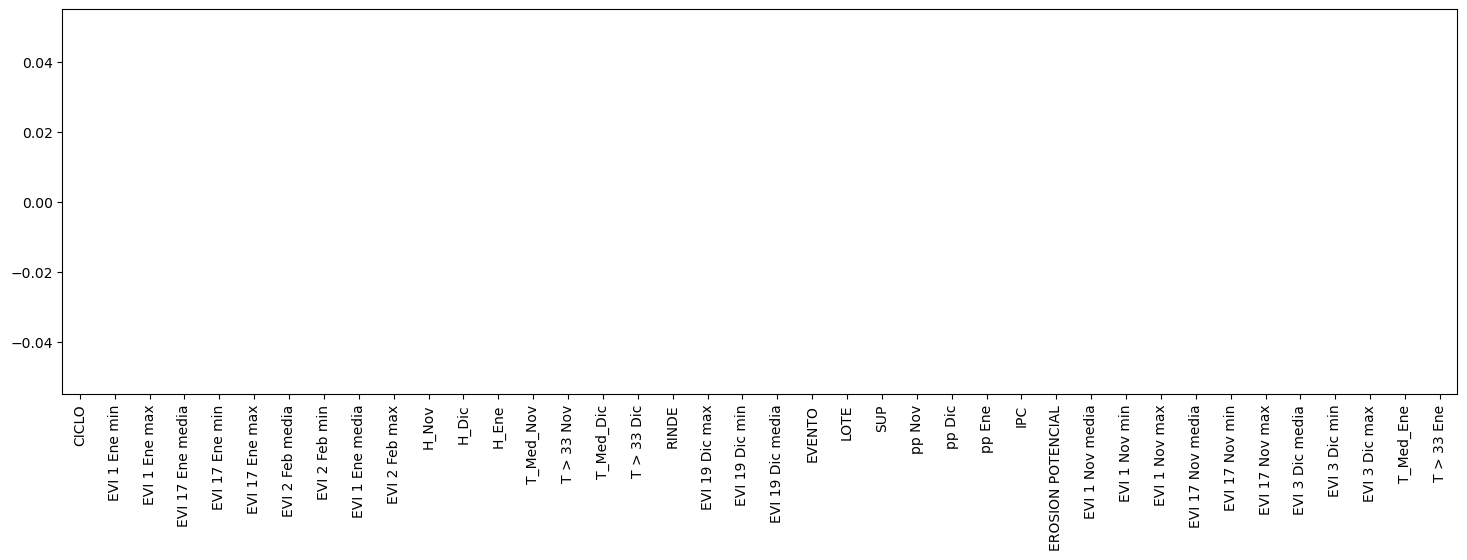

In [15]:
# Chequear que no queden valores NaN
df.isnull().sum().sort_values().plot.bar(figsize=(18, 5))

In [16]:
# Descripci√≥n estad√≠stica del las variables numericas
df.describe().round(1)


SUP  EVI 1 Nov media  EVI 1 Nov min  EVI 1 Nov max  EVI 17 Nov media  \
count  176.0            176.0          176.0          176.0             176.0   
mean    84.7              0.4            0.3            0.4               0.5   
std     46.7              0.1            0.1            0.1               0.1   
min      8.5              0.2            0.2            0.2               0.2   
25%     53.5              0.3            0.2            0.3               0.5   
50%     76.6              0.3            0.3            0.4               0.6   
75%    109.6              0.4            0.4            0.5               0.6   
max    264.1              0.7            0.6            0.8               0.8   

       EVI 17 Nov min  EVI 17 Nov max  EVI 3 Dic media  EVI 3 Dic min  \
count           176.0           176.0            176.0          176.0   
mean              0.4             0.6              0.6            0.6   
std               0.1             0.1              0.1            0.1   
min               0.0             0.2              0.3            0.2   
25%               0.3             0.5              0.6            0.5   
50%               0.4             0.6              0.6            0.6   
75%               0.5             0.7              0.7            0.6   
max               0.7             0.8              0.9            0.9   

       EVI 3 Dic max  ...  EVI 2 Feb media  EVI 2 Feb min  EVI 2 Feb max  \
count          176.0  ...            176.0          176.0          176.0   
mean             0.7  ...              0.3            0.3            0.4   
std              0.1  ...              0.1            0.1            0.1   
min              0.3  ...              0.2            0.1            0.2   
25%              0.6  ...              0.2            0.2            0.3   
50%              0.7  ...              0.3            0.2            0.4   
75%              0.8  ...              0.4            0.3            0.4   
max              0.9  ...              0.5            0.5            0.7   

         RINDE  T_Med_Nov  T > 33 Nov  T_Med_Dic  T > 33 Dic  T_Med_Ene  \
count    176.0      176.0       176.0      176.0       176.0      176.0   
mean    7019.6       21.3         1.1       23.5         2.5       25.3   
std     2468.1        1.1         2.0        1.0         3.0        0.6   
min      390.0       20.3         0.0       21.7         0.0       24.2   
25%     5610.2       20.5         0.0       22.7         0.0       25.1   
50%     7278.0       20.9         0.0       23.5         3.0       25.2   
75%     8678.8       21.8         1.0       24.1         3.0       25.8   
max    13315.0       24.1         7.0       26.8        17.0       26.5   

       T > 33 Ene  
count       176.0  
mean          6.1  
std           3.9  
min           0.0  
25%           2.0  
50%           5.0  
75%           9.0  
max          13.0  

[8 rows x 29 columns]

In [17]:
# Descripcion de la variables categoricas
df.describe(include=["O"])

CICLO EVENTO LOTE pp Nov pp Dic pp Ene  IPC  \
count       176    176  176    176    176    176  176   
unique       16      3  112     77     72     78   27   
top     2005/06   Ni√±a    1     55    164    202   50   
freq         20     77    4     13     13     13   44   

                EROSION POTENCIAL H_Nov H_Dic H_Ene  
count                         176   176   176   176  
unique                          4   126   124   132  
top     moderadamente susceptible  1384  1169  1378  
freq                           84     4     5     4

In [18]:
# Converitr las variables pp Nov, pp Dic, pp Ene, IPC, H_Nov, H_Dic, H_Ene,  a float
df["pp Nov"] = df["pp Nov"].astype(float)
df["pp Dic"] = df["pp Dic"].astype(float)
df["pp Ene"] = df["pp Ene"].astype(float)
df["IPC"] = df["IPC"].astype(float)
df["H_Nov"] = df["H_Nov"].astype(float)
df["H_Dic"] = df["H_Dic"].astype(float)
df["H_Ene"] = df["H_Ene"].astype(float)


In [19]:
# Obt√©n la columna "RINDE"
rinde_column = df.pop("RINDE")
# Agrega la columna "RINDE" al final del DataFrame
df["RINDE"] = rinde_column
# Elimina las columnas "CICLO" y "LOTE"
df = df.drop([ "CICLO", "LOTE"], axis=1)
df

EVENTO    SUP  pp Nov  pp Dic  pp Ene   IPC  \
0    Neutro   64.8   353.0   140.0   156.0  52.0   
1    Neutro  118.4   353.0   140.0   156.0  34.0   
2    Neutro  143.6   353.0   140.0   156.0  32.0   
3    Neutro  143.1   358.0   136.0   120.0  32.0   
4    Neutro   69.4   337.0   153.0   170.0  50.0   
..      ...    ...     ...     ...     ...   ...   
171    Ni√±a   92.3   231.0   367.0   399.0  40.0   
172    Ni√±a  213.8   228.0   389.0   407.0  50.0   
173    Ni√±a   79.1   231.0   367.0   399.0  73.0   
174    Ni√±a  129.1   228.0   389.0   407.0  32.0   
175    Ni√±a  128.8   228.0   389.0   407.0  34.0   

                EROSION POTENCIAL  EVI 1 Nov media  EVI 1 Nov min  \
0       moderadamente susceptible         0.212712         0.2035   
1    practicamente no susceptible         0.509707         0.4630   
2       moderadamente susceptible         0.484929         0.4630   
3       moderadamente susceptible         0.327773         0.2531   
4       moderadamente susceptible         0.374044         0.2448   
..                            ...              ...            ...   
171     moderadamente susceptible         0.338064         0.3020   
172  practicamente no susceptible         0.410230         0.3490   
173         levemente susceptible         0.344189         0.3190   
174     moderadamente susceptible         0.382760         0.3327   
175  practicamente no susceptible         0.408714         0.3589   

     EVI 1 Nov max  ...   H_Nov   H_Dic   H_Ene  T_Med_Nov  T > 33 Nov  \
0           0.2397  ...  1458.0   677.0  1064.0       20.4           0   
1           0.6164  ...  1463.0   696.0  1111.0       20.4           0   
2           0.5108  ...  1459.0   689.0  1093.0       20.4           0   
3           0.4823  ...  1455.0   689.0  1092.0       20.4           0   
4           0.4344  ...  1483.0   759.0  1239.0       20.4           0   
..             ...  ...     ...     ...     ...        ...         ...   
171         0.3869  ...   783.0  1315.0  1483.0       20.8           0   
172         0.4725  ...   770.0  1328.0  1480.0       20.8           0   
173         0.3784  ...   783.0  1307.0  1490.0       20.8           0   
174         0.5227  ...   779.0  1318.0  1482.0       20.8           0   
175         0.4522  ...   764.0  1346.0  1472.0       20.8           0   

     T_Med_Dic  T > 33 Dic  T_Med_Ene  T > 33 Ene  RINDE  
0         22.9           0       24.5           6   6675  
1         22.9           0       24.5           6   8357  
2         22.9           0       24.5           6   7296  
3         22.9           0       24.5           6   4668  
4         22.9           0       24.5           6   5848  
..         ...         ...        ...         ...    ...  
171       24.5           5       25.1           1   6484  
172       24.5           5       25.1           1   8030  
173       24.5           5       25.1           1   6507  
174       24.5           5       25.1           1   7896  
175       24.5           5       25.1           1   9943  

[176 rows x 38 columns]

In [20]:
# Contabilizar las categorias de la columna EVENTO
df.value_counts("EVENTO")

EVENTO
Ni√±a      77
Ni√±o      69
Neutro    30
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVENTO             176 non-null    object 
 1   SUP                176 non-null    float64
 2   pp Nov             176 non-null    float64
 3   pp Dic             176 non-null    float64
 4   pp Ene             176 non-null    float64
 5   IPC                176 non-null    float64
 6   EROSION POTENCIAL  176 non-null    object 
 7   EVI 1 Nov media    176 non-null    float64
 8   EVI 1 Nov min      176 non-null    float64
 9   EVI 1 Nov max      176 non-null    float64
 10  EVI 17 Nov media   176 non-null    float64
 11  EVI 17 Nov min     176 non-null    float64
 12  EVI 17 Nov max     176 non-null    float64
 13  EVI 3 Dic media    176 non-null    float64
 14  EVI 3 Dic min      176 non-null    float64
 15  EVI 3 Dic max      176 non-null    float64
 16  EVI 19 Dic media   176 non

# Graficos üìà

## Hisotrgramas de las variables numericas 

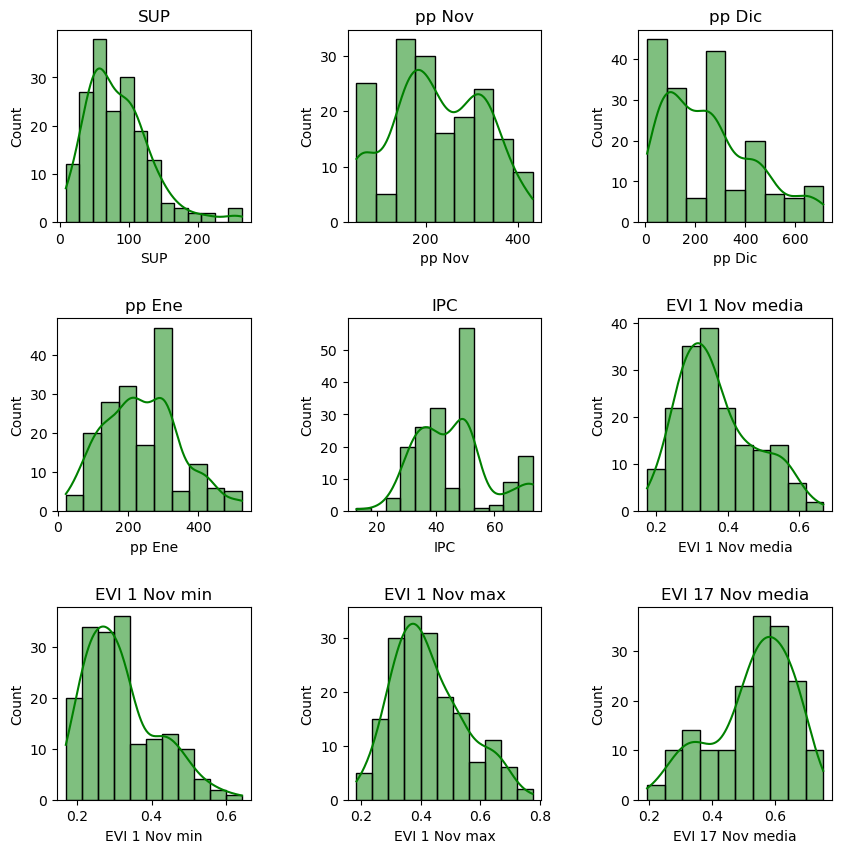

In [22]:
# Graficar las variables numericas
import numpy as np
fig, ax = plt.subplots (3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_numericas = ["SUP", "pp Nov", "pp Dic", "pp Ene", "IPC", "EVI 1 Nov media", "EVI 1 Nov min", "EVI 1 Nov max", "EVI 17 Nov media"]

for i, variable in enumerate(variables_numericas):
    sns.histplot(df[variable], ax=ax[i//3, i%3], color="green", kde=True)
    ax[i//3, i%3].set_title(variable)

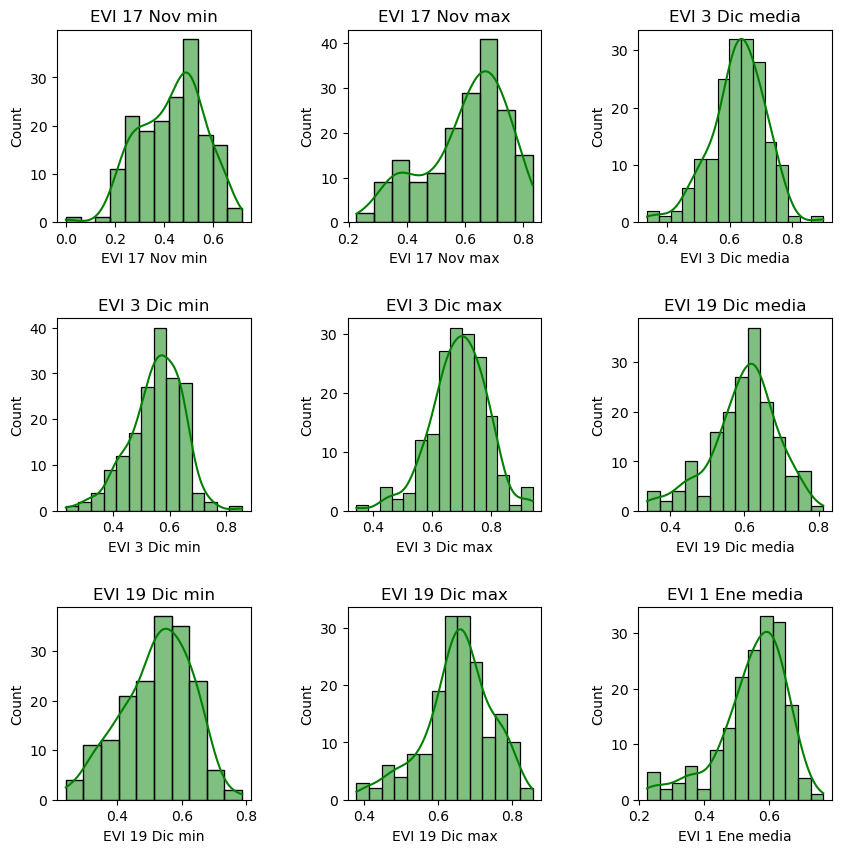

In [23]:
fig, ax = plt.subplots (3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_numericas = ["EVI 17 Nov min", "EVI 17 Nov max", "EVI 3 Dic media", "EVI 3 Dic min", "EVI 3 Dic max", "EVI 19 Dic media", "EVI 19 Dic min", "EVI 19 Dic max", "EVI 1 Ene media"]

for i, variable in enumerate(variables_numericas):
    sns.histplot(df[variable], ax=ax[i//3, i%3], color="green", kde=True)
    ax[i//3, i%3].set_title(variable)

plt.show()

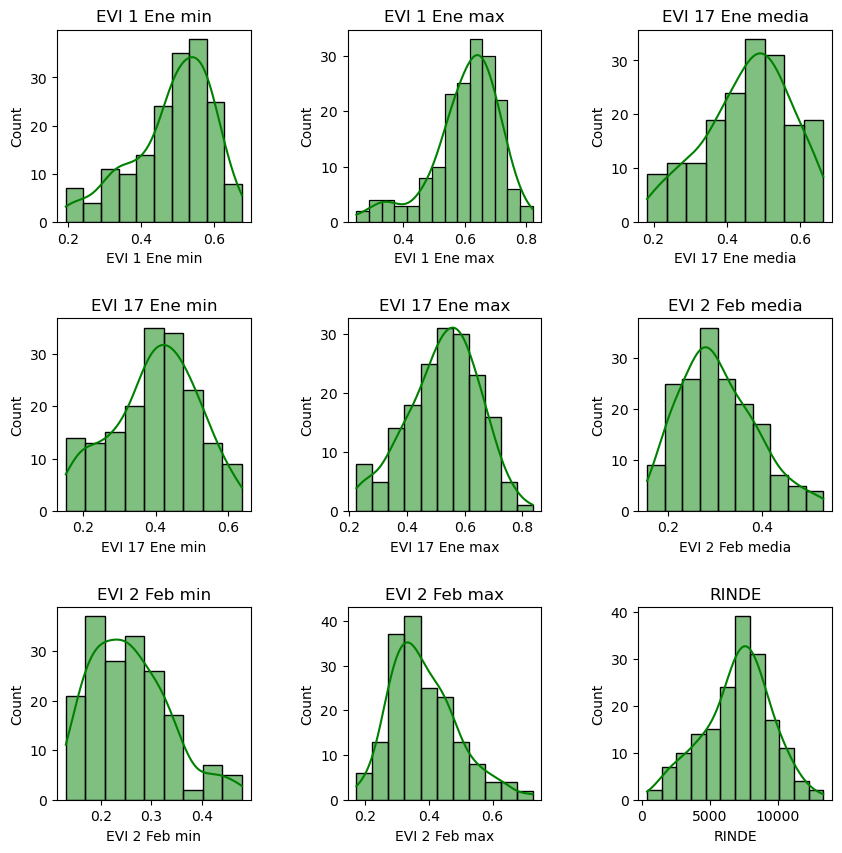

In [24]:
fig, ax = plt.subplots (3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_numericas = ["EVI 1 Ene min", "EVI 1 Ene max", "EVI 17 Ene media", "EVI 17 Ene min", "EVI 17 Ene max", "EVI 2 Feb media", "EVI 2 Feb min", "EVI 2 Feb max", "RINDE"]

for i, variable in enumerate(variables_numericas):
    sns.histplot(df[variable], ax=ax[i//3, i%3], color="green", kde=True)
    ax[i//3, i%3].set_title(variable)

plt.show()

### Los histogramas de rendimiento y el EVI de diciembre presentan una distribuci√≥n normal, mientras que la precipitaci√≥n de diciembre tiende a concentrarse hacia valores m√°s bajos.

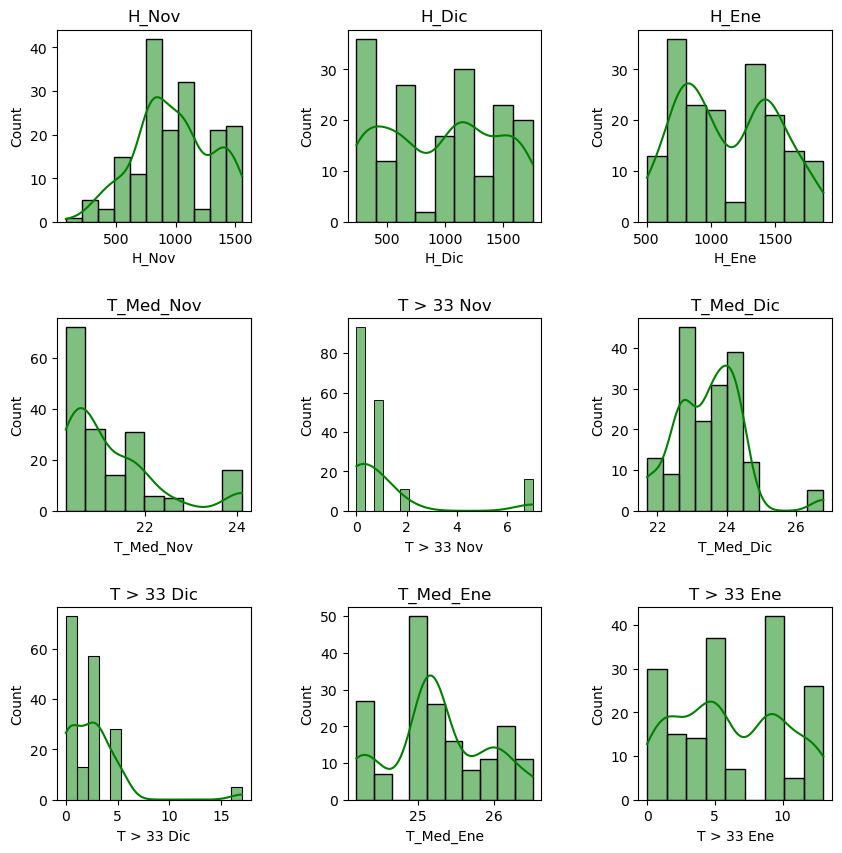

In [25]:
fig, ax = plt.subplots (3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_numericas = ["H_Nov", "H_Dic", "H_Ene", "T_Med_Nov", "T > 33 Nov", "T_Med_Dic", "T > 33 Dic", "T_Med_Ene", "T > 33 Ene"]

for i, variable in enumerate(variables_numericas):
    sns.histplot(df[variable], ax=ax[i//3, i%3], color="green", kde=True)
    ax[i//3, i%3].set_title(variable)

plt.show()

## Graficas variables categ√≥ricas 

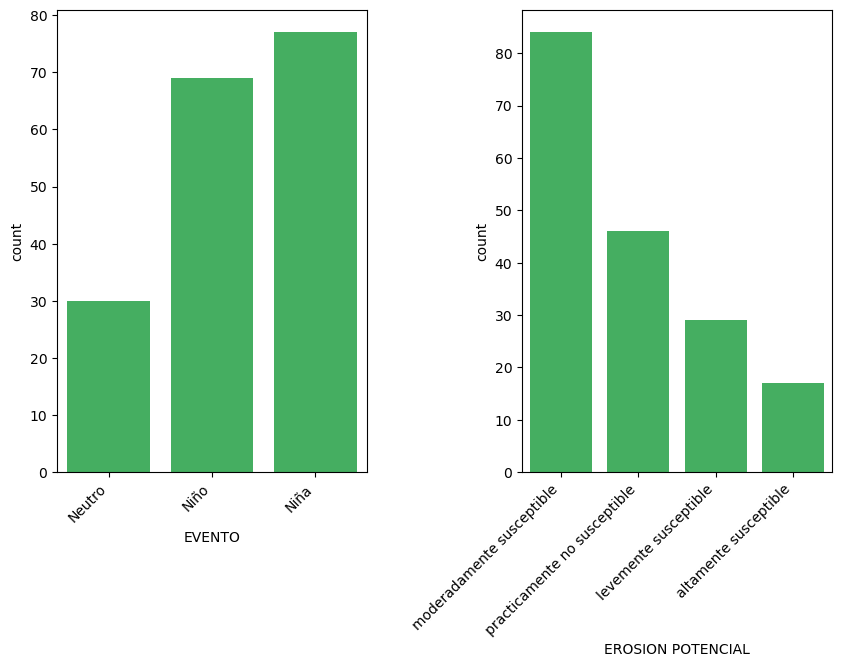

In [26]:
# Graficar variables categoricas 
fig, ax = plt.subplots (1, 2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_categoricas =[ "EVENTO", "EROSION POTENCIAL"]

for i, variable in enumerate(variables_categoricas[:2]):
    sns.countplot(x=variable, data=df, ax=ax[i], color="#34bf59")
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

plt.show()

### An√°lisis de valores at√≠picos 

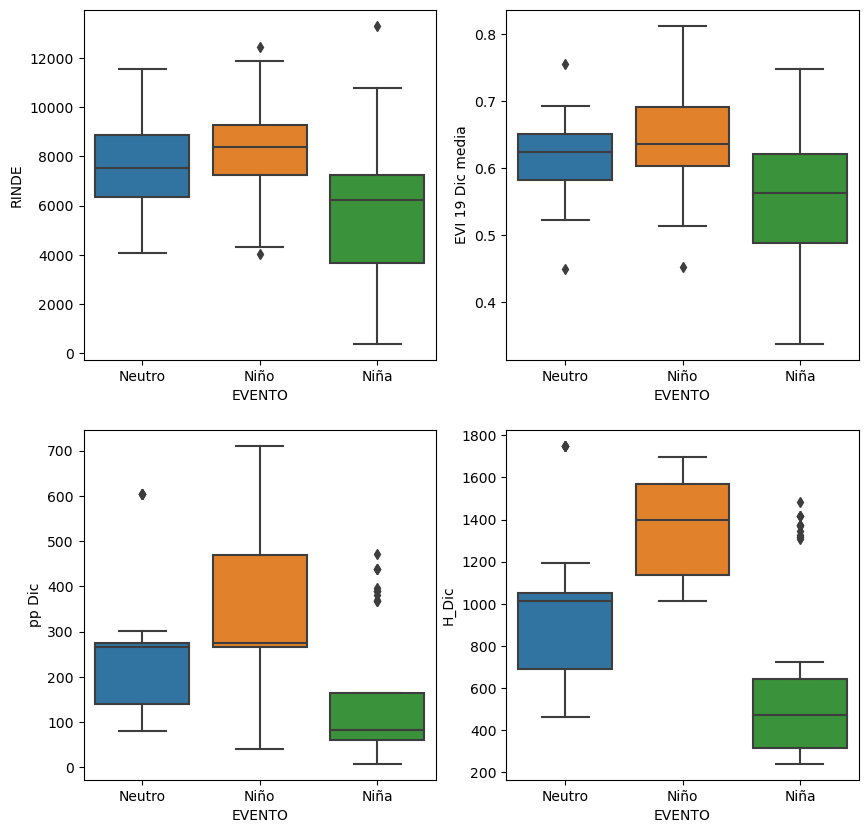

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.boxplot(x="EVENTO", y="RINDE", data=df, ax=axes[0, 0])
sns.boxplot(x="EVENTO", y="EVI 19 Dic media", data=df, ax=axes[0, 1])
sns.boxplot(x="EVENTO", y="pp Dic", data=df, ax=axes[1, 0])
sns.boxplot(x="EVENTO", y="H_Dic", data=df, ax=axes[1, 1])

plt.show()

**El periodo cr√≠tico del ma√≠z de primera se ubica entre 15 d√≠as previos y 15 d√≠as posteriores a la floraci√≥n. Por lo tanto, analizaron algunas variables en este mes y los eventos clim√°ticos.
La mediana de precipitaci√≥n en el mes de diciembre m√°s elevada se detecta en los eventos Ni√±o, en contraposici√≥n, en los eventos Ni√±a la mediana de precipitaci√≥n es la m√°s baja.
El valor m√°ximo de la mediana del rendimiento se detect√≥ en los a√±os Ni√±o, mientras que el valor m√°s bajo de la mediana se registr√≥ en los a√±os Ni√±a.
En general, la distribuci√≥n del rendimiento es normal o tiende a ser normal tanto en los tres eventos clim√°ticos.
El NDVI de fecha 19/Dic presenta un comportamiento similar al observado en los plots evento y rendimiento. Con valores m√°ximos de los plots que relacionan Evento y Rendimiento.
Por otra parte, la humedad del suelo en diciembre relacionado con el tipo de evento detalla que en los a√±os Ni√±o posee la media m√°s elevada, en segundo lugar se ubica los a√±os Neutro y el valor m√°s bajo se registra en los a√±os Ni√±a.
En conclusi√≥n:
Los eventos Ni√±o poseen mayor precipaci√≥n, lo cual tiene una relaci√≥n positiva con los cambios de humedad en el suelo y por ende en los valores de NDVI**

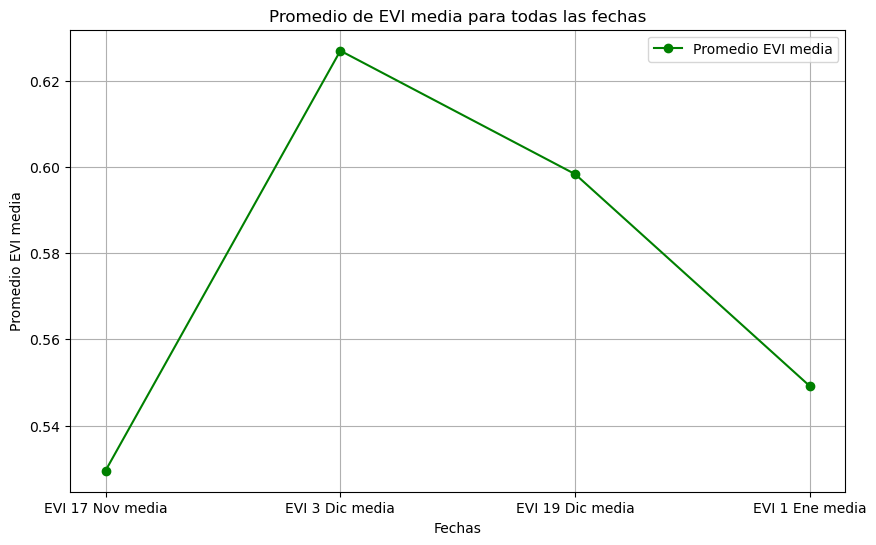

In [28]:
# Selecciona las columnas de EVI media
evi_cols = ['EVI 17 Nov media', 'EVI 3 Dic media',
             'EVI 19 Dic media', 'EVI 1 Ene media']

# Calcula el promedio de EVI media para cada fecha
promedio_evi_media = df[evi_cols].mean()

# Genera el gr√°fico
plt.figure(figsize=(10, 6))

# Grafica la curva de promedio de EVI media
plt.plot(evi_cols, promedio_evi_media, marker='o', color='green', label='Promedio EVI media')

# Configura el gr√°fico
plt.xlabel('Fechas')
plt.ylabel('Promedio EVI media')
plt.title('Promedio de EVI media para todas las fechas')
plt.legend()
plt.grid(True)

# Muestra el gr√°fico
plt.show()


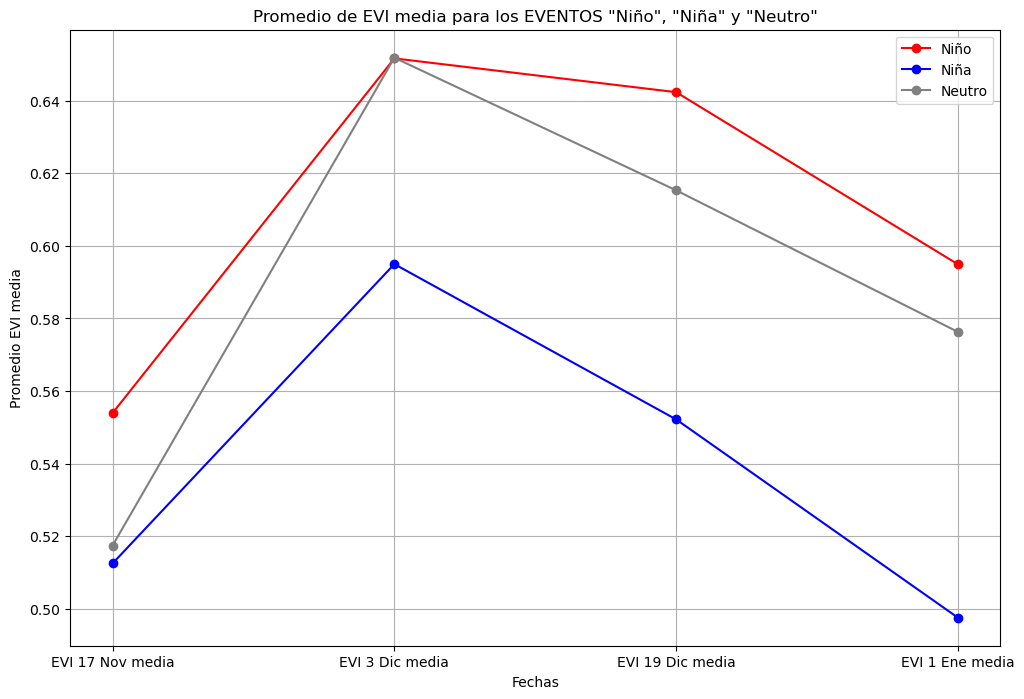

√Årea bajo la curva para Ni√±o: 1.8684641345983855
√Årea bajo la curva para Ni√±a: 1.6520989410495397
√Årea bajo la curva para Neutro: 1.8140022158212157


In [29]:
from scipy.integrate import trapz

# Filtra los datos para los EVENTOS "Ni√±o", "Ni√±a" y "Neutro"
datos_nino = df[df['EVENTO'] == 'Ni√±o']
datos_nina = df[df['EVENTO'] == 'Ni√±a']
datos_neutro = df[df['EVENTO'] == 'Neutro']

# Selecciona las columnas de EVI media
evi_cols = ['EVI 17 Nov media', 'EVI 3 Dic media',
             'EVI 19 Dic media', 'EVI 1 Ene media']

# Calcula el promedio de EVI media para cada fecha para cada evento
promedio_evi_media_nino = datos_nino[evi_cols].mean()
promedio_evi_media_nina = datos_nina[evi_cols].mean()
promedio_evi_media_neutro = datos_neutro[evi_cols].mean()

# Calcula la integral (√°rea bajo la curva) para cada evento
area_nino = trapz(promedio_evi_media_nino, dx=1)
area_nina = trapz(promedio_evi_media_nina, dx=1)
area_neutro = trapz(promedio_evi_media_neutro, dx=1)

# Genera el gr√°fico
plt.figure(figsize=(12, 8))

# Grafica las curvas de promedio de EVI media para cada evento
plt.plot(evi_cols, promedio_evi_media_nino, marker='o', color='red', label='Ni√±o')
plt.plot(evi_cols, promedio_evi_media_nina, marker='o', color='blue', label='Ni√±a')
plt.plot(evi_cols, promedio_evi_media_neutro, marker='o', color='grey', label='Neutro')

# Configura el gr√°fico
plt.xlabel('Fechas')
plt.ylabel('Promedio EVI media')
plt.title('Promedio de EVI media para los EVENTOS "Ni√±o", "Ni√±a" y "Neutro"')
plt.legend()
plt.grid(True)

# Muestra el gr√°fico y las √°reas calculadas
plt.show()

# Muestra las √°reas bajo la curva para cada evento
print('√Årea bajo la curva para Ni√±o:', area_nino)
print('√Årea bajo la curva para Ni√±a:', area_nina)
print('√Årea bajo la curva para Neutro:', area_neutro)

**Se graficaron las curvas de EVI entre las fechas 17/Nov al 01/Ene para los tres tipos de Evento.
Los picos m√°ximos se ubicaron para fecha 03/Dic en los tres eventos pero con las siguientes diferencias.
Ni√±o: luego de alcanzar el pico el descenso es m√°s suave lo que demuestra un lento secado del cultivo asociado al incremento de las precipitaciones.
Neutro: posee el mismo valor de pico pero el descenso posterior es m√°s marcado.
Ni√±a: El pico es el m√°s bajo y adem√°s el descenso es bastante marcado.
Estas curvas generan un √°rea donde el mayor valor lo presenta el evento Ni√±o y el menor la Ni√±a.**

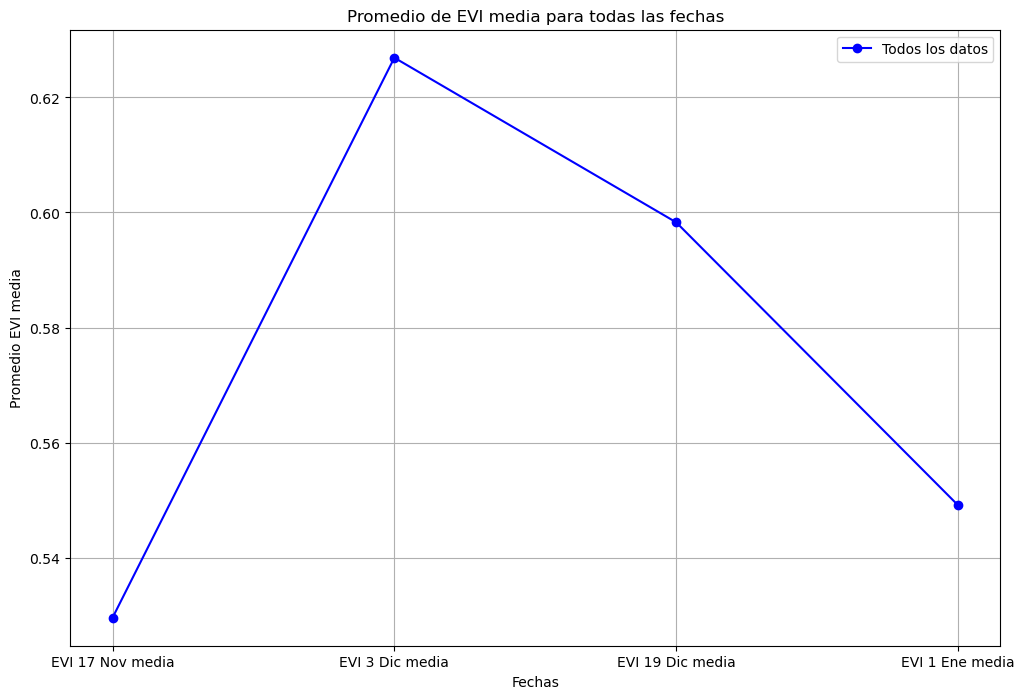

√Årea bajo la curva para todos los datos: 1.7645210808110208


In [30]:

# Selecciona las columnas de EVI media para todas las fechas
evi_cols_all = ['EVI 17 Nov media', 'EVI 3 Dic media',
    'EVI 19 Dic media', 'EVI 1 Ene media']

# Calcula el promedio de EVI media para cada fecha
promedio_evi_media_all = df[evi_cols_all].mean()

# Calcula la integral (√°rea bajo la curva) para todos los datos
area_all = trapz(promedio_evi_media_all, dx=1)

# Genera el gr√°fico
plt.figure(figsize=(12, 8))

# Grafica la curva de promedio de EVI media para todos los datos
plt.plot(evi_cols_all, promedio_evi_media_all, marker='o', color='blue', label='Todos los datos')

# Configura el gr√°fico
plt.xlabel('Fechas')
plt.ylabel('Promedio EVI media')
plt.title('Promedio de EVI media para todas las fechas')
plt.legend()
plt.grid(True)

# Muestra el gr√°fico y el √°rea calculada
plt.show()

# Muestra el √°rea bajo la curva para todos los datos
print('√Årea bajo la curva para todos los datos:', area_all)

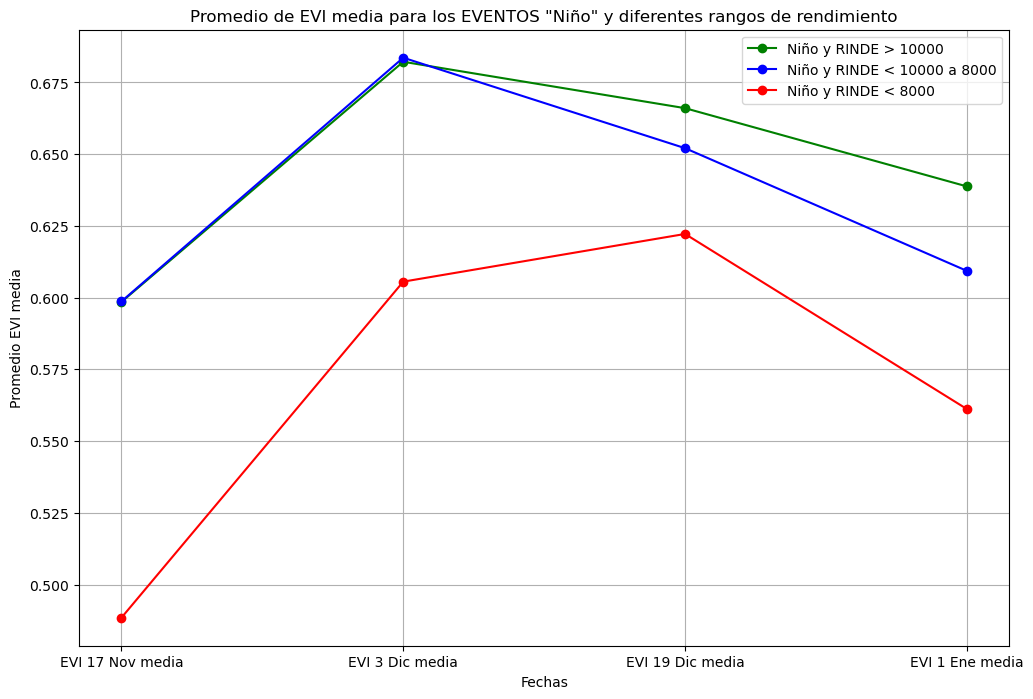

√Årea bajo la curva para Ni√±o y RINDE > 10000: 1.966827919071669
√Årea bajo la curva para Ni√±o y RINDE < 10000 a 8000: 1.9396743124231124
√Årea bajo la curva para Ni√±o y RINDE < 8000: 1.7525548285056547


In [31]:
# Filtrar los datos para los EVENTOS "Ni√±o"
df_nino = df[df['EVENTO'] == 'Ni√±o']

# Filtrar los datos para los diferentes rangos de rendimiento
df_nino_gt_10000 = df_nino[df_nino['RINDE'] > 10000]
df_nino_lt_10000_8000 = df_nino[(df_nino['RINDE'] < 10000) & (df_nino['RINDE'] >= 8000)]
df_nino_lt_8000 = df_nino[df_nino['RINDE'] < 8000]

# Seleccionar las columnas de EVI media
evi_cols = ['EVI 17 Nov media', 'EVI 3 Dic media', 'EVI 19 Dic media', 'EVI 1 Ene media']

# Calcular el promedio de EVI media para cada fecha para cada grupo de rendimiento
promedio_evi_media_nino_gt_10000 = df_nino_gt_10000[evi_cols].mean()
promedio_evi_media_nino_lt_10000_8000 = df_nino_lt_10000_8000[evi_cols].mean()
promedio_evi_media_nino_lt_8000 = df_nino_lt_8000[evi_cols].mean()

# Calcular el √°rea bajo la curva para cada grupo de rendimiento
area_nino_gt_10000 = trapz(promedio_evi_media_nino_gt_10000, dx=1)
area_nino_lt_10000_8000 = trapz(promedio_evi_media_nino_lt_10000_8000, dx=1)
area_nino_lt_8000 = trapz(promedio_evi_media_nino_lt_8000, dx=1)

# Generar el gr√°fico
plt.figure(figsize=(12, 8))

# Graficar las curvas de promedio de EVI media para cada grupo de rendimiento
plt.plot(evi_cols, promedio_evi_media_nino_gt_10000, marker='o', color='green', label='Ni√±o y RINDE > 10000')
plt.plot(evi_cols, promedio_evi_media_nino_lt_10000_8000, marker='o', color='blue', label='Ni√±o y RINDE < 10000 a 8000')
plt.plot(evi_cols, promedio_evi_media_nino_lt_8000, marker='o', color='red', label='Ni√±o y RINDE < 8000')

# Configurar el gr√°fico
plt.xlabel('Fechas')
plt.ylabel('Promedio EVI media')
plt.title('Promedio de EVI media para los EVENTOS "Ni√±o" y diferentes rangos de rendimiento')
plt.legend()
plt.grid(True)

# Mostrar el gr√°fico
plt.show()

# Mostrar el √°rea bajo la curva para cada grupo de rendimiento
print('√Årea bajo la curva para Ni√±o y RINDE > 10000:', area_nino_gt_10000)
print('√Årea bajo la curva para Ni√±o y RINDE < 10000 a 8000:', area_nino_lt_10000_8000)
print('√Årea bajo la curva para Ni√±o y RINDE < 8000:', area_nino_lt_8000)

**Espec√≠ficamente para el evento Ni√±o se generaron tres curvas que muestran tres rangos de rendimiento:
Superior a 10.000 kg/ha posee el m√°ximo pico y un descenso gradual.
Rinde entre 8.000 a 10.000 kg/ha posee un pico levemente mayor pero luego el descenso es de mayor pendiente.
Rinde menor a 8.000 kg/ha, el pico es inferior al resto y se traslada a la fecha 19/Dic y con un posterior descenso marcado.
El √°rea bajo la curva de estos tres rangos respeta el orden de los rangos de rendimiento.**

In [32]:
# Unificar columnas de EVI  para cada mes
# Columnas para EVI media y EVI min/max de cada mes
columns_to_average = [
    'EVI 1 Nov media', 'EVI 17 Nov media',
    'EVI 3 Dic media', 'EVI 19 Dic media',
    'EVI 1 Ene media', 'EVI 17 Ene media',
    'EVI 2 Feb media']

columns_to_min_max = [
    'EVI 1 Nov min', 'EVI 17 Nov min',
    'EVI 1 Nov max', 'EVI 17 Nov max',
    'EVI 3 Dic min', 'EVI 19 Dic min',
    'EVI 3 Dic max', 'EVI 19 Dic max',
    'EVI 1 Ene min', 'EVI 17 Ene min',
    'EVI 1 Ene max', 'EVI 17 Ene max',
    'EVI 2 Feb min', 'EVI 2 Feb max'
]

# Crea nuevos DataFrames para EVI media y EVI min/max
df_monthly_media = df[columns_to_average]
df_monthly_min_max = df[columns_to_min_max]

# Calcula los promedios para EVI media
df['EVI Nov mean'] = df_monthly_media[['EVI 1 Nov media', 'EVI 17 Nov media']].mean(axis=1)
df['EVI Dic mean'] = df_monthly_media['EVI 3 Dic media']
df['EVI Ene mean'] = df_monthly_media[['EVI 1 Ene media', 'EVI 17 Ene media']].mean(axis=1)
df['EVI Feb mean'] = df_monthly_media['EVI 2 Feb media']

# Calcula los promedios para EVI min/max
df['EVI Nov min'] = df_monthly_min_max[['EVI 1 Nov min', 'EVI 17 Nov min']].mean(axis=1)
df['EVI Nov max'] = df_monthly_min_max[['EVI 1 Nov max', 'EVI 17 Nov max']].mean(axis=1)
df['EVI Dic min'] = df_monthly_min_max[['EVI 3 Dic min', 'EVI 19 Dic min']].mean(axis=1)
df['EVI Dic max'] = df_monthly_min_max[['EVI 3 Dic max', 'EVI 19 Dic max']].mean(axis=1)
df['EVI Ene min'] = df_monthly_min_max[['EVI 1 Ene min', 'EVI 17 Ene min']].mean(axis=1)
df['EVI Ene max'] = df_monthly_min_max[['EVI 1 Ene max', 'EVI 17 Ene max']].mean(axis=1)
df['EVI Feb min'] = df_monthly_min_max[['EVI 2 Feb min']].copy()
df['EVI Feb max'] = df_monthly_min_max[['EVI 2 Feb max']].copy()

# Elimina las columnas originales de EVI media y EVI min/max
df.drop(columns=columns_to_average + columns_to_min_max, inplace=True)

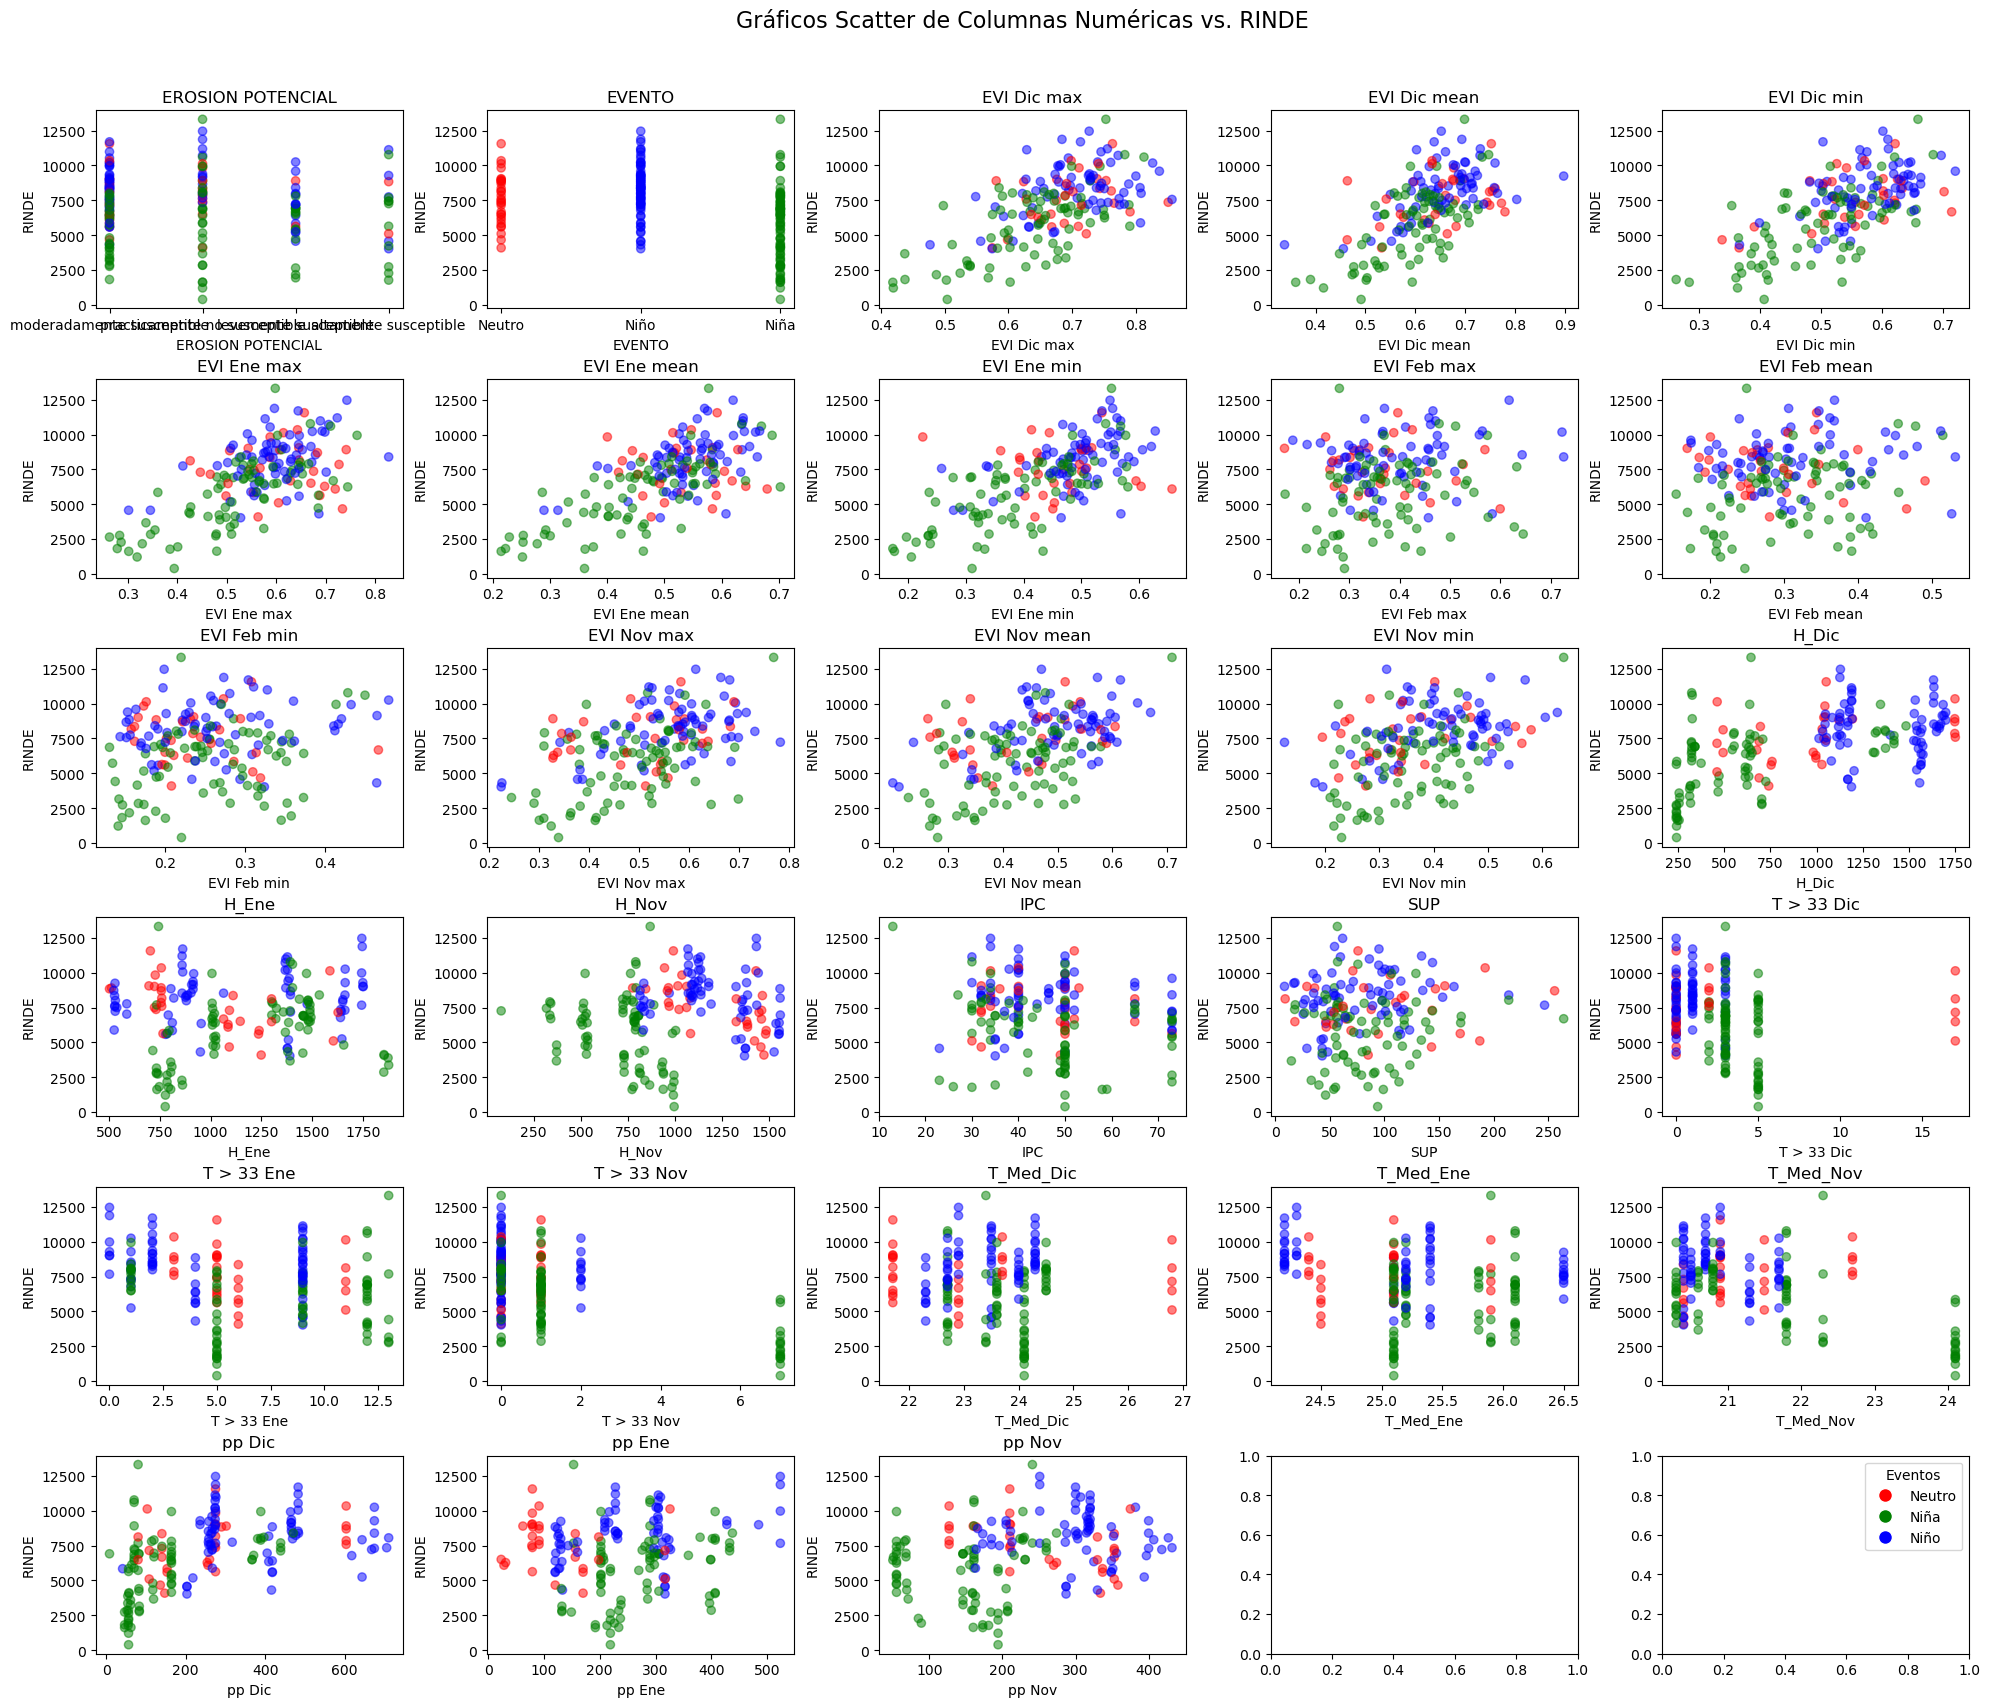

In [33]:
columnas_numericas = df.columns.difference(['RINDE'])

num_filas = 6  # Cambia esto seg√∫n tus preferencias
num_columnas = 5  # Cambia esto seg√∫n tus preferencias

# Mapeo de colores para los eventos
colores_evento = {'Neutro': 'red', 'Ni√±a': 'green', 'Ni√±o': 'blue'}

# Crea un nuevo plot
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 18))
fig.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])  # Ajusta el espaciado entre los gr√°ficos

# Itera a trav√©s de las columnas num√©ricas y crea los gr√°ficos scatter
for i, columna in enumerate(columnas_numericas):
    fila = i // num_columnas
    columna_actual = i % num_columnas
    evento = df['EVENTO']  # Suponiendo que la columna se llama 'EVENTO'
    colores = [colores_evento[e] for e in evento]  # Asigna colores seg√∫n el evento
    axs[fila, columna_actual].scatter(df[columna], df['RINDE'], alpha=0.5, c=colores)
    axs[fila, columna_actual].set_title(columna)
    axs[fila, columna_actual].set_xlabel(columna)
    axs[fila, columna_actual].set_ylabel('RINDE')

# Crea una barra de color (leyenda) para los eventos
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores_evento[evento], markersize=10, label=evento) for evento in colores_evento.keys()]
plt.legend(handles=handles, title='Eventos', loc='upper right')

# A√±ade un t√≠tulo general al gran plot
plt.suptitle("Gr√°ficos Scatter de Columnas Num√©ricas vs. RINDE", fontsize=16)

# Muestra el plot
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8680\2519332552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


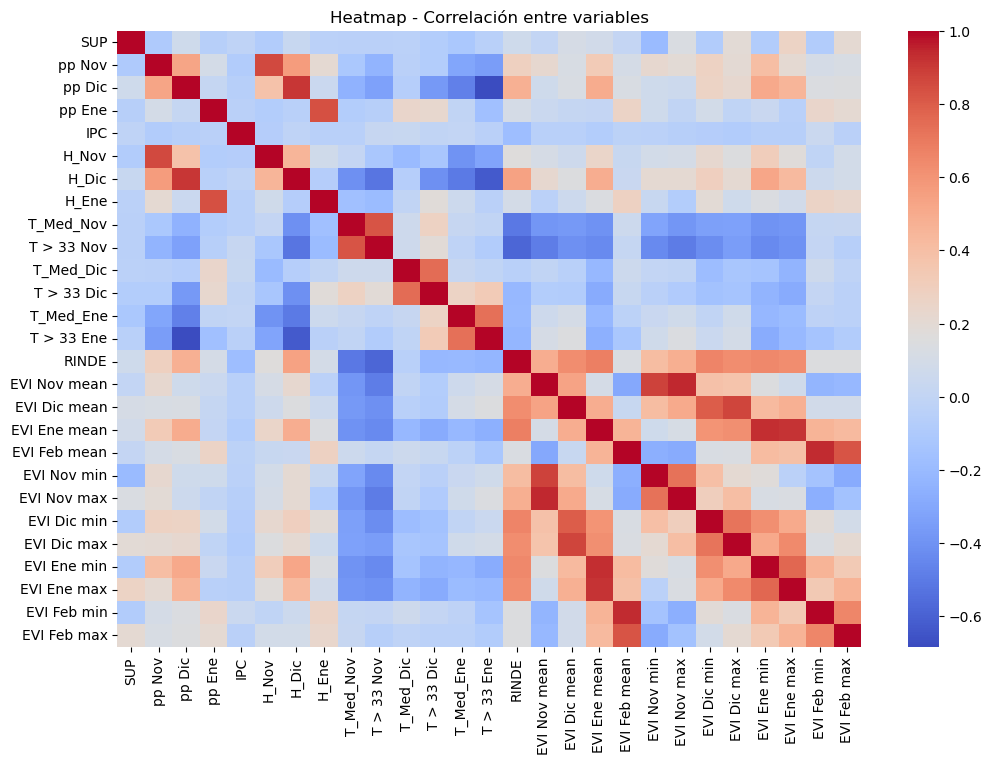

In [34]:
# Generar la matriz de correlaci√≥n
corr_matrix = df.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Heatmap - Correlaci√≥n entre variables')
plt.show()

# Seleccion caracteristicas

In [35]:
print(df.columns)

Index(['EVENTO', 'SUP', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC',
       'EROSION POTENCIAL', 'H_Nov', 'H_Dic', 'H_Ene', 'T_Med_Nov',
       'T > 33 Nov', 'T_Med_Dic', 'T > 33 Dic', 'T_Med_Ene', 'T > 33 Ene',
       'RINDE', 'EVI Nov mean', 'EVI Dic mean', 'EVI Ene mean', 'EVI Feb mean',
       'EVI Nov min', 'EVI Nov max', 'EVI Dic min', 'EVI Dic max',
       'EVI Ene min', 'EVI Ene max', 'EVI Feb min', 'EVI Feb max'],
      dtype='object')


In [36]:
# Seleccionar las columnas que deseas incluir en el nuevo DataFrame
columnas_seleccionadas = ['EVENTO','EVI Nov mean','EVI Dic mean', 'EVI Ene mean', 'EVI Nov min',
       'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min',
       'EVI Ene max','H_Nov', 'H_Dic', 'H_Ene','RINDE']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_reduc = df[columnas_seleccionadas]

In [37]:
X = df_reduc.drop(columns=['RINDE'])  
y = df_reduc['RINDE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convierte los arrays de NumPy a DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [38]:
X_train

EVENTO  EVI Nov mean  EVI Dic mean  EVI Ene mean  EVI Nov min  \
152   Ni√±o      0.605450      0.639700      0.508400      0.60545   
128   Ni√±a      0.369982      0.501857      0.381200      0.30915   
104   Ni√±a      0.347645      0.389650      0.222155      0.27795   
78    Ni√±o      0.512256      0.709833      0.648856      0.48810   
36    Ni√±o      0.478150      0.689456      0.635822      0.43365   
..     ...           ...           ...           ...          ...   
71    Ni√±o      0.646375      0.676300      0.525840      0.48420   
106   Ni√±a      0.315925      0.503300      0.375742      0.27210   
14    Ni√±o      0.326800      0.523767      0.550950      0.24695   
92    Ni√±a      0.424217      0.602950      0.402156      0.34520   
102   Ni√±a      0.407558      0.476367      0.300317      0.35065   

     EVI Nov max  EVI Dic min  EVI Dic max  EVI Ene min  EVI Ene max   H_Nov  \
152      0.60545      0.62755      0.62755      0.50840      0.50840  1178.0   
128      0.42300      0.36440      0.57270      0.30795      0.42740   372.0   
104      0.41365      0.26235      0.43745      0.17415      0.27890   780.0   
78       0.53940      0.66315      0.72970      0.62095      0.67045  1087.0   
36       0.52755      0.63520      0.72830      0.60560      0.65305  1119.0   
..           ...          ...          ...          ...          ...     ...   
71       0.69230      0.57470      0.68175      0.50135      0.54200  1068.0   
106      0.36140      0.36035      0.56835      0.31990      0.40110   865.0   
14       0.42245      0.46500      0.59235      0.52250      0.57705  1535.0   
92       0.50170      0.50670      0.65840      0.35100      0.48840   534.0   
102      0.46120      0.36545      0.62740      0.23520      0.47805   939.0   

      H_Dic   H_Ene  
152  1126.0  1749.0  
128   472.0  1655.0  
104   246.0   748.0  
78   1680.0   915.0  
36   1192.0  1370.0  
..      ...     ...  
71   1633.0   863.0  
106   241.0   862.0  
14   1576.0   954.0  
92    616.0  1023.0  
102   241.0   742.0  

[123 rows x 13 columns]

# Preprosesamiento

Para el preprocesamiento se utilizo un enfoque de programacion oreintada a objetos (poo). Este enfoque permite una mayor legibilidad y escalabilidad del codigo a la vez que permite ahorrar pasos y lineas del mismo. Otra de las grandes ventajas es que es facilmente reutilizable tanto en este caso como en otros. 
La logica general de esta metodologia es crear objetos que tomen como argumentos a los dataframes y devuelvan estos mismos luego de haberles aplicado un proceso de dummificacion escalado, normalizado, etc.

## Dummificaci√≥n

Este paso del prepocesamiento crea una clase capaz de generar objetos de tipo "CustomOneHotEncoding", los cuales toman como argumento a un df
y a las columnas que se quieran transformar. El resultado es un nuevo dataframe con las columnas seleccionadas dummificadas utilizando el metodo de sklearn OneHotEncoder.


In [39]:
class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_encode):
        self.columns_to_encode = columns_to_encode
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None

    def fit(self, X, y=None):
        X_cat = X[self.columns_to_encode]
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy[self.columns_to_encode]
        X_num = X_copy.drop(self.columns_to_encode, axis=1)
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh,
                                columns=self._columns,
                                index=X_copy.index)
        X_copy = X_num.join(X_cat_oh)
        return X_copy

In [ ]:
columns_to_encode = ['EVENTO']

custom_encoder = CustomOneHotEncoding(columns_to_encode)

X_train_dum = custom_encoder.fit_transform(X_train)
X_test_dum = custom_encoder.fit_transform(X_test)

## Escalado
En este paso del preprocesado tomamos el dataframe previamente dummificado, instanciamos un objeto de CustomScaler y lo pasamos como argumento del mismo. Esto devolvera un nuevo dataframe con todas las columnas escaladas segun el metodo RobustScaler de sklearn.

In [41]:
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.robust_scaler = RobustScaler()
        self.robust_scaler.fit(X)
        return self
    
    def transform(self, X, y=None):
        X_scaled = self.robust_scaler.transform(X)
        X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
        return X_scaled_df

In [42]:
custom_scaler = CustomScaler()

X_train_pro = custom_scaler.fit_transform(X_train_dum)
X_test_pro = custom_scaler.fit_transform(X_test_dum)

# Modelado

Una vez disponemos del dataframe preprocesado podemos comenzar a implementar diferentes tipos de modelos con el fin de compararlos entre si y medir su eficiencia a la hora de hacer predicciones.

## *Regresion Lineal*
El primer modelo que se implemento es el mas sencillo de todos, la regresion lineal, este modelo ajusta la recta que mejor pueda explicar el comportamiento de los datos. Para su implementacion se utilizo de la libreria sklearn el modulo LinearRegresion.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Ajusta el modelo de regresi√≥n lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_pro, y_train)

# Predice los valores en el conjunto de prueba
y_pred = lin_reg.predict(X_test_pro)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadr√°tico medio (MSE): {mse}")
print(f"Error absoluto medio (MSE): {mae}")
print(f"Coeficiente de determinaci√≥n (R^2): {r2}")

Error cuadr√°tico medio (MSE): 1951420.7378418946
Error absoluto medio (MSE): 1055.4890116345057
Coeficiente de determinaci√≥n (R^2): 0.6014121250687933


**Resultados del modelo:** como se puede observar el modelo ajusta una recta con un r2 de 0.59, y un error absoluto medio de 1053 kilos lo cual a los fines de este trabajo no resulta muy eficiente. 

*Graficos extra:* Se generaron rectas de regresion lineal para cada una de las columnas originales con respecto a la columna de rinde, esto fue con motivo de intentar entender como cada variable se esta comportando a la hora de hacer predicciones. Observamos que en norma general las columas de indice EVI tienen a ajustar rectas mejores que las demas columnas.

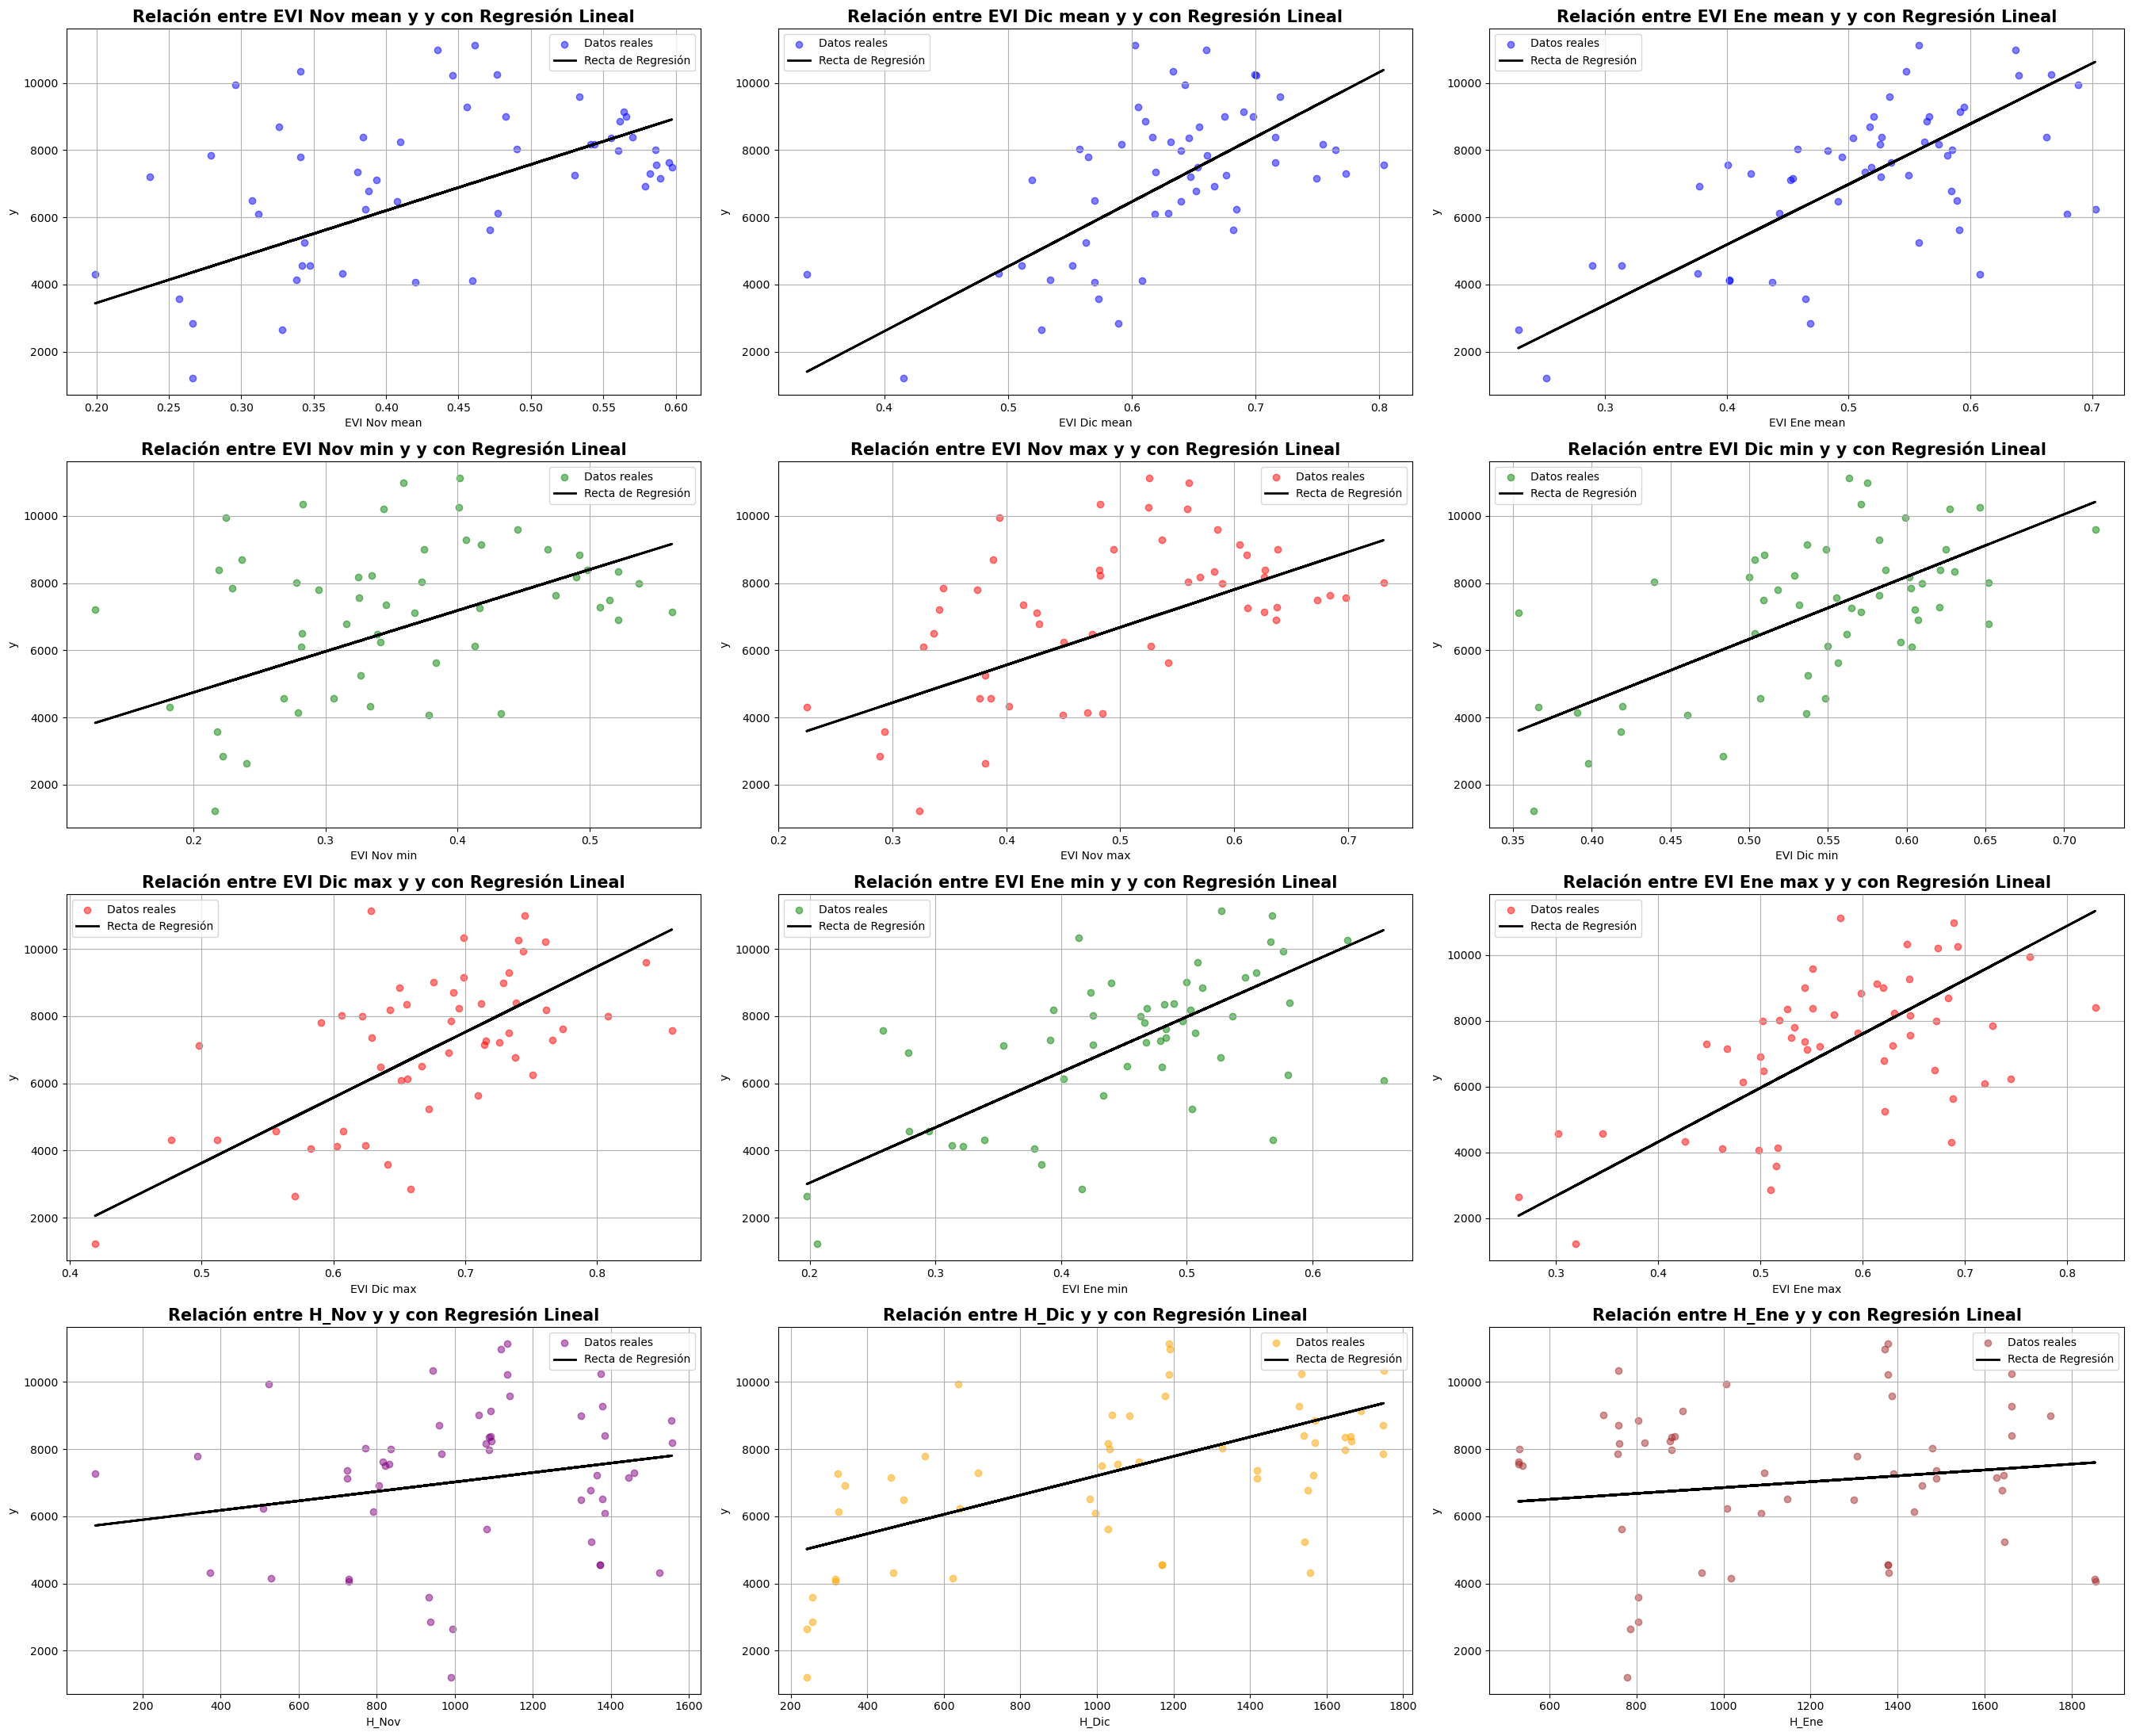

In [44]:
columns_to_plot = ['EVI Nov mean','EVI Dic mean', 'EVI Ene mean', 'EVI Nov min',
       'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min',
       'EVI Ene max','H_Nov', 'H_Dic', 'H_Ene',]

color_dict = {
    'mean': 'blue',
    'min': 'green',
    'max': 'red',
    'H_Nov': 'purple',
    'H_Dic': 'orange',
    'H_Ene': 'brown'
}

num_rows = 4  
num_cols = 3  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(27, 22))
fig.subplots_adjust(hspace=0.5) 

for i, column in enumerate(columns_to_plot):
    row = i // num_cols  
    col = i % num_cols   
    
    lin_reg.fit(X_train[[column]], y_train)
    
    y_pred = lin_reg.predict(X_test[[column]])
    
    for key in color_dict:
        if key in column:
            color = color_dict[key]
            break
    
    axes[row, col].scatter(X_test[column], y_test, alpha=0.5, label='Datos reales', color=color)
    axes[row, col].plot(X_test[column], y_pred, color='black', linewidth=2, label='Recta de Regresi√≥n')
    axes[row, col].set_xlabel(column)  
    axes[row, col].set_ylabel("y")      
    axes[row, col].set_title(f'Relaci√≥n entre {column} y y con Regresi√≥n Lineal', fontsize=15, fontweight='bold')  
    axes[row, col].legend()             
    axes[row, col].grid(True)           

plt.tight_layout()
plt.savefig("Graficos")
plt.show()

*Extra:* se combinaron todas las columnas de indice EVI del dataframe con el proposito de intentar comprender si es que por si solas ajustan una mejor recta, pero los resultados no mejoraron con respecto a la regresion original con el dataset de entrenamiento.

In [45]:
columns_original = ['EVI Nov mean', 'EVI Dic mean', 'EVI Ene mean', 'EVI Nov min',
                   'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min', 'EVI Ene max', 'H_Nov', 'H_Dic', 'H_Ene']

columns_mean = [col for col in columns_original if 'EVI' in col]

Evi_train = X_train[columns_mean].mean(axis=1).to_frame(name='EVI mean')
Evi_test = X_test[columns_mean].mean(axis=1).to_frame(name='EVI mean')

Error cuadr√°tico medio (MSE): 2219081.2571446765
Coeficiente de determinaci√≥n (R^2): 0.5467410664277619


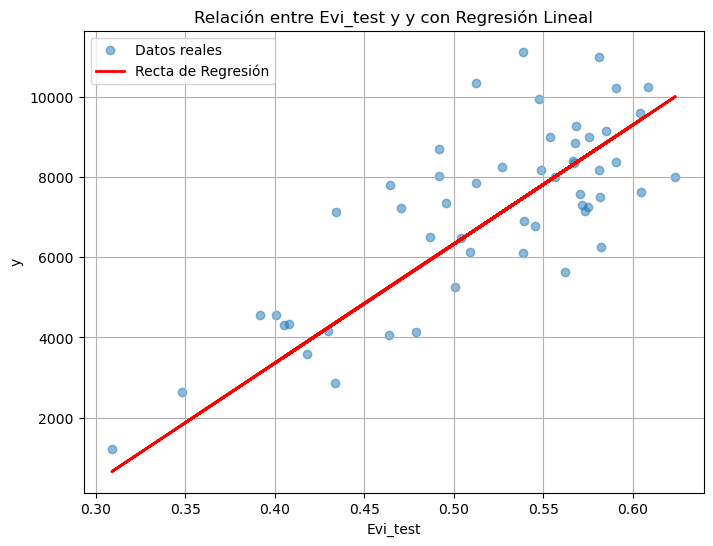

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(Evi_train, y_train)

y_pred = lin_reg.predict(Evi_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadr√°tico medio (MSE): {mse}")
print(f"Coeficiente de determinaci√≥n (R^2): {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(Evi_test, y_test, alpha=0.5, label='Datos reales')  
plt.plot(Evi_test, y_pred, color='red', linewidth=2, label='Recta de Regresi√≥n') 
plt.xlabel("Evi_test")
plt.ylabel("y")  
plt.title(f'Relaci√≥n entre Evi_test y y con Regresi√≥n Lineal') 
plt.legend() 
plt.grid(True)  
plt.show()

## *Random Forest:*

Para intentar conseguir una mejor prediccion de los datos, se opto por un modelo que no es precisamente lineal, se trata del modulo de sklearn de RandomForestRegressor, el cual a diferencia de la regresion lineal simple busca hacer las predicciones del target a partir de generar arboles de decision, estos toman distintos criterios de desicion (umbrales) y observan el comportamiento de los datos para esos umbrales,  dividiendo los datos segun pertenezcan o no a un rango especifico de ese umbral. El modelo de Random Forest lo que hace precisamente es generar tantos arboles como se les pase por parametros y buscar el criterio comun que haya salido del total de decisiones. Observemos los resultados...


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

random_forest = RandomForestRegressor(max_leaf_nodes=8, n_estimators=100, n_jobs=-1,
                      random_state=42)

random_forest.fit(X_train_dum, y_train)

y_pred = random_forest.predict(X_test_dum)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadr√°tico medio (MSE): {mse}")
print(f"Error absoluto medio (MSE): {mae}")
print(f"Coeficiente de determinaci√≥n (R^2): {r2}")

Error cuadr√°tico medio (MSE): 1523842.5002358106
Error absoluto medio (MSE): 966.8910371590317
Coeficiente de determinaci√≥n (R^2): 0.6887472126741028


*Resultados:* Observamos que este modelo obtuvo mejores resultados que el de regresion lineal simple, con un r2 de 0.68 y un error absoluto medio de 965 kg. Notese que para este caso trabajamos el dataframe solo dummificado pero no escalado, ya que una caracteristica de random forest es que suele trabajar mejor con los datos originales en contraposicion con los datos escalados. Esto puede ser una ventaja, ya que los dataframes que necesita requieren menor preprocesamiento.

Tanto para este modelo como para otros (mayormente de clasificacion) existen tecnicas capaces de encontrar los hiperparametros que mejor ajusten el modelo a el caso de estudio, esto es posible gracias a un modulo de la libreria de sklearn llamado GridSearchCV, el cual genera una grilla de hiperparametros y luego genera instancias de modelado para cada una de las combinaciones que existan en la grilla. Es defir, si tenemos 3 valores para un hiperparametro y 3 para el otro se evaluaran 9 tipos de modelos diferentes. Una ventaja de este modulo es que permite extraer el mejor estimador.

In [53]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = [
    # Prueba 9 (3x3) combinaciones de hiperpar√°metros
    {'n_estimators': [100, 200, 500], 'max_leaf_nodes': [8, 16, 24]},
    # Luego prueba 6 (2x3) combinaciones con bootstrap en False
    {'bootstrap': [False], 'n_estimators': [100, 500], 'max_features': [2, 3, 4]},
]

rnd_clf = RandomForestRegressor(n_jobs=-1, random_state=42)
grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='f1_weighted', return_train_score=True)

grid_search.fit(X_train_dum, y_train)
best_params = grid_search.best_params_

print("Mejores par√°metros encontrados:", best_params)

Mejores par√°metros encontrados: {'max_leaf_nodes': 8, 'n_estimators': 100}


Otra gran ventaja de random forest es que cuenta con un metodo llamado feature_importances_ que ordena las caracteristicas del df segun el nivel de importancia que tuvieron en el proceso de modelado. De esta manera se creo una serie ordenada de las caracteristicas mas importantes

In [49]:
random_forest.feature_importances_
feature_importances = {name: score for name, score in zip(list(X_train), random_forest.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(10)

H_Nov           0.160222
EVI Nov max     0.154611
EVI Dic max     0.126676
EVI Ene min     0.123697
EVI Nov mean    0.121936
EVI Dic mean    0.094838
EVI Dic min     0.079190
EVI Nov min     0.049679
EVENTO          0.033586
EVI Ene max     0.020049
dtype: float64

### *Graficos RF*

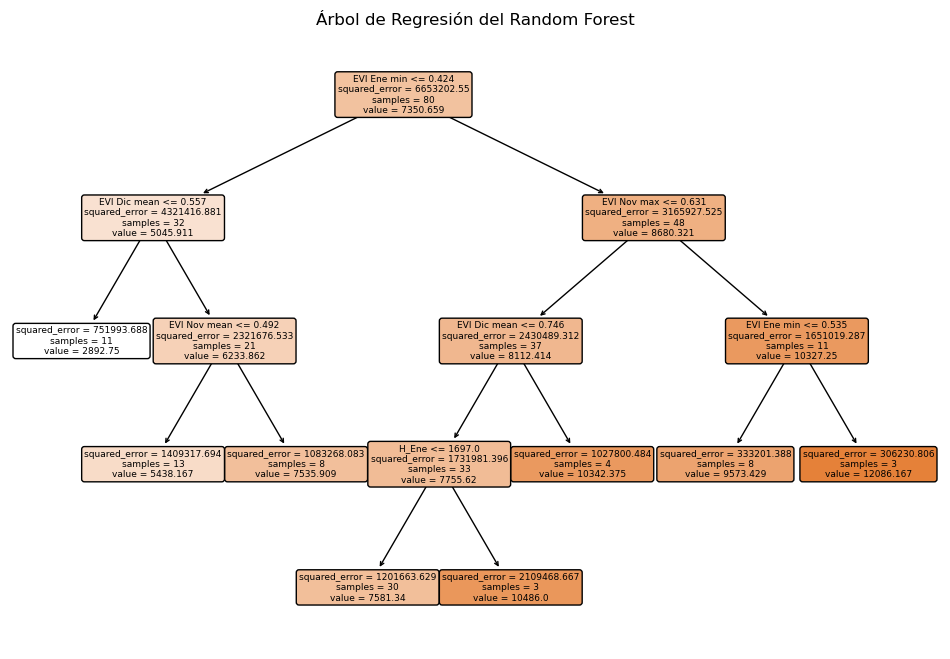

In [50]:
from sklearn.tree import plot_tree

tree = random_forest.estimators_[5]

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X_train_dum.columns, rounded=True)
plt.title("√Årbol de Regresi√≥n del Random Forest")
plt.show()

## *Suport Vector Machine:*
Se genero un modelo SVM para comparar con los demas. 

In [51]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de SVM para regresi√≥n
svm_regressor = SVR(kernel='linear')

# Entrenar el modelo en los datos de entrenamiento
svm_regressor.fit(X_train_dum, y_train)

# Realizar predicciones en los datos de prueba
y_pred = svm_regressor.predict(X_test_dum)

# Calcular m√©tricas de evaluaci√≥n
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadr√°tico medio (MSE): {mse}")
print(f"Error absoluto medio (MSE): {mae}")
print(f"Coeficiente de determinaci√≥n (R^2): {r2}")

Error cuadr√°tico medio (MSE): 3162400.9348484087
Error absoluto medio (MSE): 1453.1373526941138
Coeficiente de determinaci√≥n (R^2): 0.3540630967693371


### *Resultados:* 
Se puede observar claramente que este fue el peor de los 3 modelos probados, con un r2 de 0.35 y un error absoluto medio de 1450 kg podemos afirmar que es el modelo que peor entiende los datos de este caso en puntual.

# CONCLUSIONES FINALES 